In [2]:
print("hello riskmate")

hello riskmate


## Importing libraries

In [26]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set seed for reproducibility
np.random.seed(42)

## Importing base data

In [8]:
base_df = pd.read_csv("./riskmate/Base Data/riskmate_profile_base_data.csv", 
                      header = 0,
                     parse_dates = True,
                     date_format = "%m-%d-%Y")
base_df.head()

,customer_id,number_policies,benefit_CI,benefit_TPD,benefit_LI,benefit_IP,smoker_status,bmi_rating,customer_dob,occupation_class,income,earliest_policy_start_date,uw_advdisc_rulename,uw_advdisc_rulealias,uw_advdisc_rulecategory,claim_reason,claim_amount
0,10000,1,0,0,0,1,0,20,03-29-2000,Creative and Design,55931,03-14-2016,Blood Test,Blood Test,MEDICAL,Coronary artery aneurysm,89908.0
1,10001,2,1,1,1,1,0,42,07-15-1981,Medical and Health Science,41219,10-14-2016,Ultrasound,Ultrasound,MEDICAL,Ischaemic cardiomyopathy,48933.0
2,10002,2,0,1,0,1,0,21,11-12-1975,Academic and Education,80170,01-11-2018,Ultrasound,Ultrasound,MEDICAL,Intentional self-harm by other means,6225.5
3,10003,1,1,1,1,0,0,12,01-02-1998,Arts and Culture,118661,11-27-2017,Blood Test,Blood Test,MEDICAL,Fracture of lateral malleolus,25579.0
4,10004,3,1,1,0,1,0,42,07-11-1987,Hospitality and Tourism,103130,05-18-2012,Previous Claim,Previous Claim,PREV CLAIM,Recurrent depressive disorder,20038.0


In [9]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 10000 non-null  int64  
 1   number_policies             10000 non-null  int64  
 2   benefit_CI                  10000 non-null  int64  
 3   benefit_TPD                 10000 non-null  int64  
 4   benefit_LI                  10000 non-null  int64  
 5   benefit_IP                  10000 non-null  int64  
 6   smoker_status               10000 non-null  int64  
 7   bmi_rating                  10000 non-null  int64  
 8   customer_dob                10000 non-null  object 
 9   occupation_class            10000 non-null  object 
 10  income                      10000 non-null  int64  
 11  earliest_policy_start_date  10000 non-null  object 
 12  uw_advdisc_rulename         10000 non-null  object 
 13  uw_advdisc_rulealias        1000

## Converting columns to date type

In [18]:
def convert_str_to_date(df, column):

    df[column] = pd.to_datetime(df[column])
    return df

In [20]:
base_df = convert_str_to_date(base_df, "customer_dob") 
base_df = convert_str_to_date(base_df, "earliest_policy_start_date")

In [21]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customer_id                 10000 non-null  int64         
 1   number_policies             10000 non-null  int64         
 2   benefit_CI                  10000 non-null  int64         
 3   benefit_TPD                 10000 non-null  int64         
 4   benefit_LI                  10000 non-null  int64         
 5   benefit_IP                  10000 non-null  int64         
 6   smoker_status               10000 non-null  int64         
 7   bmi_rating                  10000 non-null  int64         
 8   customer_dob                10000 non-null  datetime64[ns]
 9   occupation_class            10000 non-null  object        
 10  income                      10000 non-null  int64         
 11  earliest_policy_start_date  10000 non-null  datetime64[

## Creating features

In [30]:
def create_customer_age(df, column):

    end_date = datetime.strptime('03-19-2024', '%m-%d-%Y')
    df['customer_age'] = (end_date - df[column])// timedelta(days=365.25)

    return df

In [31]:
base_df = create_customer_age(base_df, "customer_dob")
base_df.columns

Index(['customer_id', 'number_policies', 'benefit_CI', 'benefit_TPD',
       'benefit_LI', 'benefit_IP', 'smoker_status', 'bmi_rating',
       'customer_dob', 'occupation_class', 'income',
       'earliest_policy_start_date', 'uw_advdisc_rulename',
       'uw_advdisc_rulealias', 'uw_advdisc_rulecategory', 'claim_reason',
       'claim_amount', 'customer_age'],
      dtype='object')

In [32]:
base_df['customer_age'].head(10)

0    23
1    42
2    48
3    26
4    36
5    38
6    50
7    21
8    37
9    36
Name: customer_age, dtype: int64

In [33]:
def create_policy_tenure(df, column):
    end_date = datetime.strptime('03-19-2024', '%m-%d-%Y')
    df['policy_tenure'] = (end_date - df[column])// timedelta(days=365.25)
    return df
    

In [34]:
base_df = create_policy_tenure(base_df, column = "earliest_policy_start_date")
base_df.columns

Index(['customer_id', 'number_policies', 'benefit_CI', 'benefit_TPD',
       'benefit_LI', 'benefit_IP', 'smoker_status', 'bmi_rating',
       'customer_dob', 'occupation_class', 'income',
       'earliest_policy_start_date', 'uw_advdisc_rulename',
       'uw_advdisc_rulealias', 'uw_advdisc_rulecategory', 'claim_reason',
       'claim_amount', 'customer_age', 'policy_tenure'],
      dtype='object')

In [35]:
base_df['policy_tenure'].head(10)

0     8
1     7
2     6
3     6
4    11
5     4
6     3
7     5
8     2
9     6
Name: policy_tenure, dtype: int64

## Creating final data for profiling

In [36]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customer_id                 10000 non-null  int64         
 1   number_policies             10000 non-null  int64         
 2   benefit_CI                  10000 non-null  int64         
 3   benefit_TPD                 10000 non-null  int64         
 4   benefit_LI                  10000 non-null  int64         
 5   benefit_IP                  10000 non-null  int64         
 6   smoker_status               10000 non-null  int64         
 7   bmi_rating                  10000 non-null  int64         
 8   customer_dob                10000 non-null  datetime64[ns]
 9   occupation_class            10000 non-null  object        
 10  income                      10000 non-null  int64         
 11  earliest_policy_start_date  10000 non-null  datetime64[

In [40]:
## final data
cols_to_drop = ["customer_dob", "earliest_policy_start_date"]
base_df_final = base_df.drop(cols_to_drop, axis = 1)
base_df_final.set_index("customer_id", inplace = True)
base_df_final.columns

Index(['number_policies', 'benefit_CI', 'benefit_TPD', 'benefit_LI',
       'benefit_IP', 'smoker_status', 'bmi_rating', 'occupation_class',
       'income', 'uw_advdisc_rulename', 'uw_advdisc_rulealias',
       'uw_advdisc_rulecategory', 'claim_reason', 'claim_amount',
       'customer_age', 'policy_tenure'],
      dtype='object')

In [41]:
base_df_final.head()

,number_policies,benefit_CI,benefit_TPD,benefit_LI,benefit_IP,smoker_status,bmi_rating,occupation_class,income,uw_advdisc_rulename,uw_advdisc_rulealias,uw_advdisc_rulecategory,claim_reason,claim_amount,customer_age,policy_tenure
customer_id,,,,,,,,,,,,,,,,
10000,1,0,0,0,1,0,20,Creative and Design,55931,Blood Test,Blood Test,MEDICAL,Coronary artery aneurysm,89908.0,23,8
10001,2,1,1,1,1,0,42,Medical and Health Science,41219,Ultrasound,Ultrasound,MEDICAL,Ischaemic cardiomyopathy,48933.0,42,7
10002,2,0,1,0,1,0,21,Academic and Education,80170,Ultrasound,Ultrasound,MEDICAL,Intentional self-harm by other means,6225.5,48,6
10003,1,1,1,1,0,0,12,Arts and Culture,118661,Blood Test,Blood Test,MEDICAL,Fracture of lateral malleolus,25579.0,26,6
10004,3,1,1,0,1,0,42,Hospitality and Tourism,103130,Previous Claim,Previous Claim,PREV CLAIM,Recurrent depressive disorder,20038.0,36,11


In [65]:
base_numeric_features = ['number_policies', 'benefit_CI', 'benefit_TPD', 'benefit_LI',
                   'benefit_IP', 'smoker_status', 'bmi_rating', 'income', 'claim_amount',
                   'customer_age', 'policy_tenure']
base_categorical_features = ['occupation_class', 'uw_advdisc_rulename' , 'uw_advdisc_rulealias',
                       'uw_advdisc_rulecategory', 'claim_reason']

## Creating data transformation pipelines

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, base_numeric_features),
        ('cat', categorical_transformer, base_categorical_features)
    ])

# KMeans clustering
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(random_state = 99999))
])

## Defining functions for calculating optimal clusters

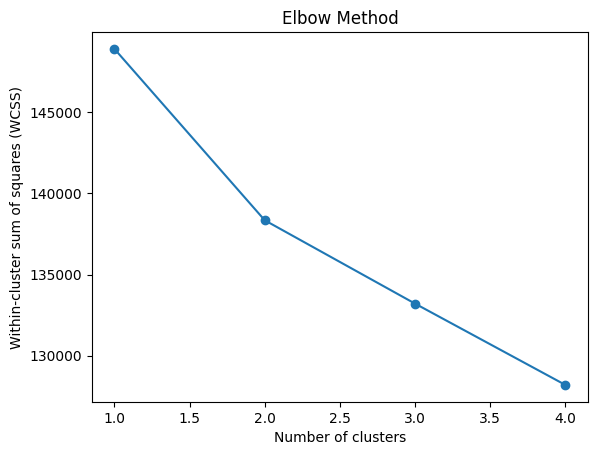

In [112]:
# Elbow method to find optimal number of clusters
def plot_elbow(data, max_clusters):
    wcss = []
    for i in range(1, max_clusters + 1):
        pipeline.set_params(kmeans__n_clusters=i)
        pipeline.fit(data)
        wcss.append(pipeline.named_steps['kmeans'].inertia_)
    
    plt.plot(range(1, max_clusters + 1), wcss, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Within-cluster sum of squares (WCSS)')
    plt.title('Elbow Method')
    plt.show()

# Plot the elbow
plot_elbow(base_df_final, 4)

In [114]:
base_df_final['cluster_label'] = pipeline.named_steps['kmeans'].labels_

In [115]:
base_df_final.head()

,number_policies,benefit_CI,benefit_TPD,benefit_LI,benefit_IP,smoker_status,bmi_rating,occupation_class,income,uw_advdisc_rulename,uw_advdisc_rulealias,uw_advdisc_rulecategory,claim_reason,claim_amount,customer_age,policy_tenure,cluster_label
customer_id,,,,,,,,,,,,,,,,,
10000,1,0,0,0,1,0,20,Creative and Design,55931,Blood Test,Blood Test,MEDICAL,Coronary artery aneurysm,89908.0,23,8,2
10001,2,1,1,1,1,0,42,Medical and Health Science,41219,Ultrasound,Ultrasound,MEDICAL,Ischaemic cardiomyopathy,48933.0,42,7,1
10002,2,0,1,0,1,0,21,Academic and Education,80170,Ultrasound,Ultrasound,MEDICAL,Intentional self-harm by other means,6225.5,48,6,0
10003,1,1,1,1,0,0,12,Arts and Culture,118661,Blood Test,Blood Test,MEDICAL,Fracture of lateral malleolus,25579.0,26,6,1
10004,3,1,1,0,1,0,42,Hospitality and Tourism,103130,Previous Claim,Previous Claim,PREV CLAIM,Recurrent depressive disorder,20038.0,36,11,0


In [116]:
base_df_final['cluster_label'].value_counts()

cluster_label
3    3190
0    2533
1    2466
2    1811
Name: count, dtype: int64

In [117]:
base_df_out = base_df_final.reset_index()

In [118]:
base_df_out

,customer_id,number_policies,benefit_CI,benefit_TPD,benefit_LI,benefit_IP,smoker_status,bmi_rating,occupation_class,income,uw_advdisc_rulename,uw_advdisc_rulealias,uw_advdisc_rulecategory,claim_reason,claim_amount,customer_age,policy_tenure,cluster_label
0,10000,1,0,0,0,1,0,20,Creative and Design,55931,Blood Test,Blood Test,MEDICAL,Coronary artery aneurysm,89908.0,23,8,2
1,10001,2,1,1,1,1,0,42,Medical and Health Science,41219,Ultrasound,Ultrasound,MEDICAL,Ischaemic cardiomyopathy,48933.0,42,7,1
2,10002,2,0,1,0,1,0,21,Academic and Education,80170,Ultrasound,Ultrasound,MEDICAL,Intentional self-harm by other means,6225.5,48,6,0
3,10003,1,1,1,1,0,0,12,Arts and Culture,118661,Blood Test,Blood Test,MEDICAL,Fracture of lateral malleolus,25579.0,26,6,1
4,10004,3,1,1,0,1,0,42,Hospitality and Tourism,103130,Previous Claim,Previous Claim,PREV CLAIM,Recurrent depressive disorder,20038.0,36,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19995,3,1,1,0,1,1,34,Healthcare,143705,Seeking treatment,Seeking treatment,MEDICAL,Spondylosis,35259.5,23,9,0
9996,19996,2,1,1,0,1,1,13,Administration and Management,51821,Seeking treatment,Seeking treatment,MEDICAL,Cancer of Ovary,19537.0,24,7,0
9997,19997,2,0,0,1,0,1,23,Medical and Health Science,159853,COVID-19,COVID-19,MEDICAL,Acute Renal Failure,53500.0,40,9,3
9998,19998,1,1,1,1,0,0,6,Engineering and Technical,86448,Blood Test,Blood Test,MEDICAL,Cancer of Lung/Bronchus,40318.0,44,3,1


In [120]:
base_df_out.to_csv('./riskmate/cluster output/cluster_output.csv', index = False)